# [import dependencies]()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.17.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# [Read Models]()

In [43]:
mymodel = tf.keras.models.load_model("./../model/MyModel.keras")
resnet_model = tf.keras.models.load_model("./../model/ResNetModel.keras")

In [44]:
mymodel.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_layer (Conv2D)            │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_layer1 (MaxPooling2D)      │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_layer (Conv2D)           │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_layer2 (MaxPooling2D)      │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ this_layer (Conv2D)             │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_layer3 (MaxPooling2D)      │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization                   │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 95)             │         3,135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,855,519 (255.03 MB)

 Trainable params: 22,285,087 (85.01 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 44,570,176 (170.02 MB)

In [45]:
resnet_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)          │ (None, 2048)           │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 95)             │         3,135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,368,671 (169.25 MB)

 Trainable params: 568,799 (2.17 MB)

 Non-trainable params: 42,662,272 (162.74 MB)

 Optimizer params: 1,137,600 (4.34 MB)

# [Valiations]()

In [46]:
# add validation data to the training data to make the model generalize better

# load the validation data
val_annotations = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/valid/_annotations.csv"
)

val_annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,hit-29-_jpg.rf.0002460aa57927fd78f439dfae18698...,640,640,Hit,204,177,355,371
1,this-21-_jpg.rf.00392809c20fae35e692ba71dcb8a5...,640,640,This,170,213,282,369
2,turtle-15-_jpg.rf.00ca6ad63e61fc66d330c698e50e...,640,640,Turtle,280,247,425,399
3,mascot-20-_jpg.rf.0100543269029e643b6351c66771...,640,640,Mascot,117,315,283,482
4,meet-26-_jpg.rf.015f393754837d733509c11522977a...,640,640,Meet,214,192,358,351


In [47]:
classes = val_annotations["class"].unique()
classes = np.sort(classes)
# create a directory for each class in the dataset
validation_path = (
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Cropped data/validation"
)
for _class in classes:
    os.makedirs(validation_path + "/" + _class.lower(), exist_ok=True)

In [48]:
current_dir_size = 0


def crop_and_save_images(dataframe, path, dir):
    global current_dir_size

    for i in range(len(dataframe)):

        image_path = path + "/" + dataframe["filename"][i]

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # get the coordinates of the bounding box
        x1 = dataframe.iloc[i, 4]
        y1 = dataframe.iloc[i, 5]
        x2 = dataframe.iloc[i, 6]
        y2 = dataframe.iloc[i, 7]

        # crop the image and resize it to 224x224

        cropped_image = cv2.resize(img[y1:y2, x1:x2], (224, 224))

        # write the image in the cropped folder
        train_croped_path = (
            "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Cropped data/"
            + dir
        )

        # get the directory name to save the image in the correct folder
        dirictory = dataframe.iloc[i, 0].split("-")[0].lower()

        # save the image in the correct folder
        cv2.imwrite(
            train_croped_path
            + "/"
            + dirictory
            + "/"
            + dirictory
            + "-"
            + str(current_dir_size)
            + ".jpg",
            cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR),
        )

        current_dir_size += 1
        """    
            plt.imshow(cropped_image)
            plt.show()
        """


# crop and save the images for the training set
path = (
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/valid"
)
crop_and_save_images(val_annotations, path, "validation")

In [49]:
# evaluate the model on the validation data

# load the validation data with generator

def generat(path):
    generator = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.0,
        height_shift_range=0.0,
        shear_range=0.0,
        zoom_range=0.0,
        horizontal_flip=False,
        vertical_flip=False,
        rescale=1 / 255.0,
        preprocessing_function=None,
        validation_split=0.1,
    ).flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=32,
        class_mode="sparse",
        color_mode="rgb",
    )
    return generator

In [50]:
generator = generat(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Cropped data/validation"
)
my_evaluations = mymodel.evaluate(generator)
resnet_evaluations = resnet_model.evaluate(generator)

my_evaluations, resnet_evaluations

Found 988 images belonging to 95 classes.
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2860 - loss: 21.1734
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.9767 - loss: 0.1053


([20.955873489379883, 0.300607293844223],
 [0.10114941745996475, 0.9726720452308655])

In [51]:
test_path = "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Cropped data/test"
for _class in classes:
    os.makedirs(test_path + "/" + _class.lower(), exist_ok=True)

In [52]:
test_annotations = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/_annotations.csv"
)

test_annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pair-13-_jpg.rf.00b5fe51fba9b40ddf2bf212cfa638...,640,640,Pair,279,252,413,361
1,papyrus-scroll-7-_jpg.rf.057bc680e540fcf9c8823...,640,640,Papyrus_Scroll,185,349,317,437
2,belongs-1-_jpg.rf.02044dee3ffba707db0388af036f...,640,640,Belongs,138,167,278,298
3,one-27-_jpg.rf.0c1b097a5ad422d790d896597e55dac...,640,640,One,401,341,451,408
4,hit-13-_jpg.rf.0919df39b6c2334496ec5ed6ed766f4...,640,640,Hit,238,115,382,337


In [53]:
path = (
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test"
)
crop_and_save_images(test_annotations, path, "test")

In [54]:
test_generator = generat(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Cropped data/test"
)

Found 324 images belonging to 95 classes.


In [55]:
test_generator.class_indices

classes = dict((v, k) for k, v in test_generator.class_indices.items())
classes

{0: '100',
 1: 'among',
 2: 'angry',
 3: 'ankh',
 4: 'aroura',
 5: 'at',
 6: 'bad_thinking',
 7: 'bandage',
 8: 'bee',
 9: 'belongs',
 10: 'birth',
 11: 'board_game',
 12: 'book',
 13: 'boy',
 14: 'branch',
 15: 'bread',
 16: 'brewer',
 17: 'builder',
 18: 'bury',
 19: 'canal',
 20: 'cloth_on_pole',
 21: 'cobra',
 22: 'composite_bow',
 23: 'cooked',
 24: 'corpse',
 25: 'dessert',
 26: 'divide',
 27: 'duck',
 28: 'elephant',
 29: 'enclosed_mound',
 30: 'eye',
 31: 'fabric',
 32: 'face',
 33: 'falcon',
 34: 'fingre',
 35: 'fish',
 36: 'flail',
 37: 'folded_cloth',
 38: 'foot',
 39: 'galena',
 40: 'giraffe',
 41: 'he',
 42: 'her',
 43: 'hit',
 44: 'horn',
 45: 'king',
 46: 'leg',
 47: 'length_of_a_human_arm',
 48: 'life_spirit',
 49: 'limit',
 50: 'lion',
 51: 'lizard',
 52: 'loaf',
 53: 'loaf_of_bread',
 54: 'man',
 55: 'mascot',
 56: 'meet',
 57: 'mother',
 58: 'mouth',
 59: 'musical_instrument',
 60: 'nile_fish',
 61: 'not',
 62: 'now',
 63: 'nurse',
 64: 'nursing',
 65: 'occur',
 66: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


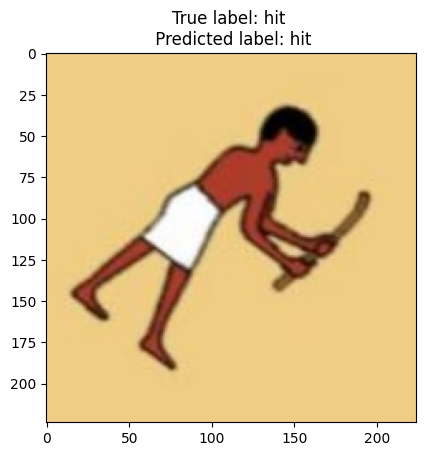

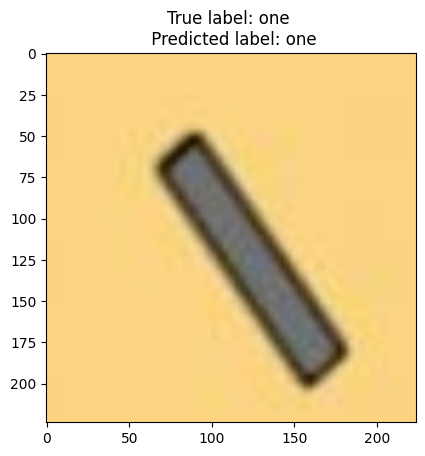

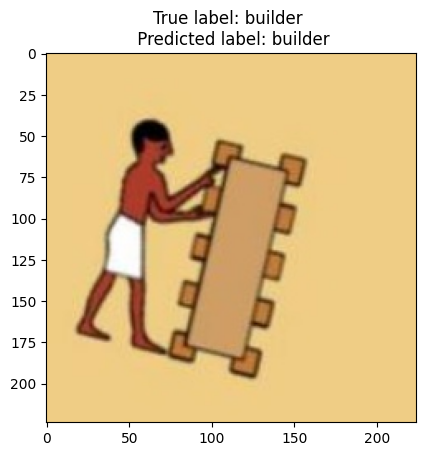

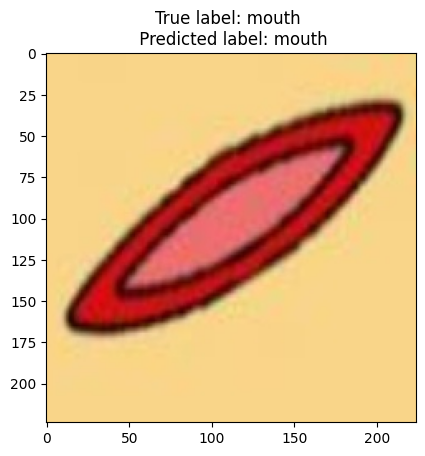

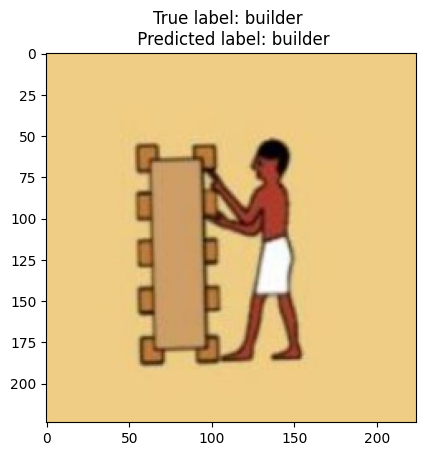

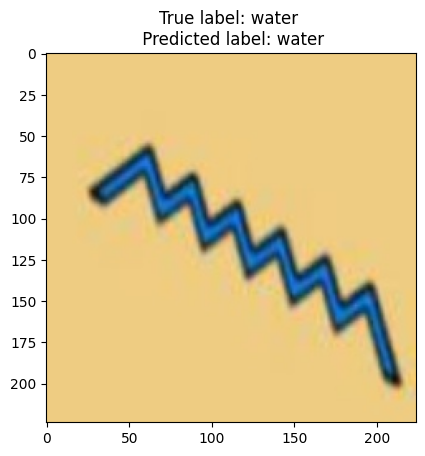

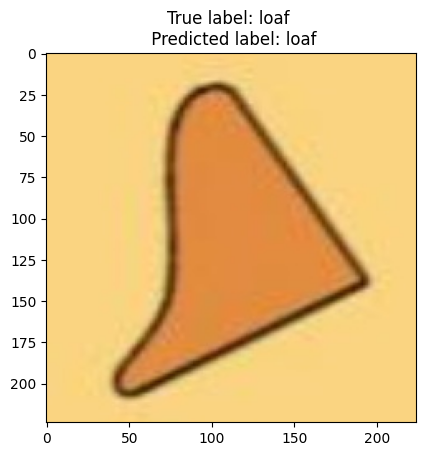

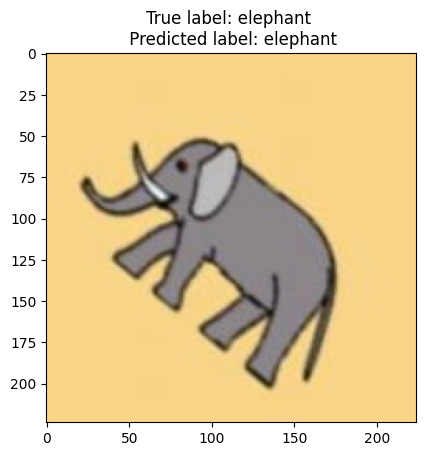

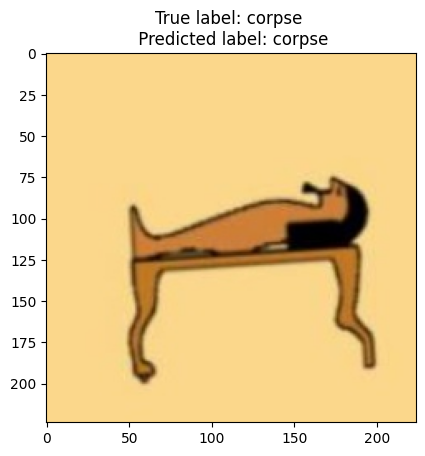

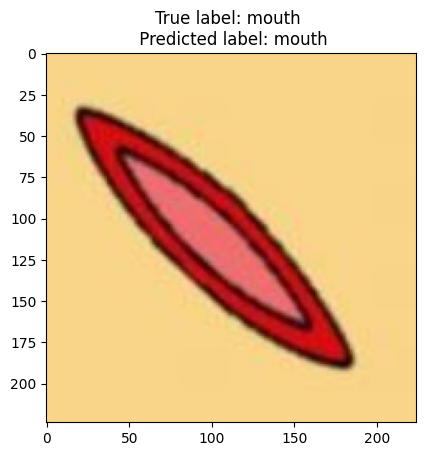

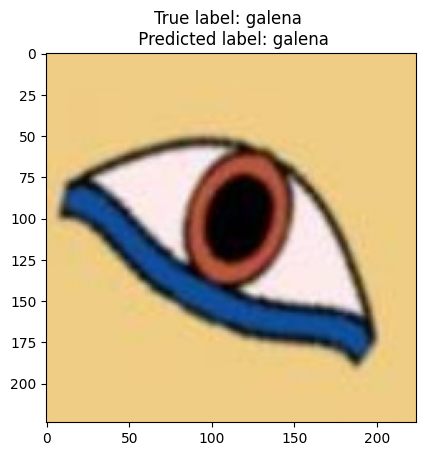

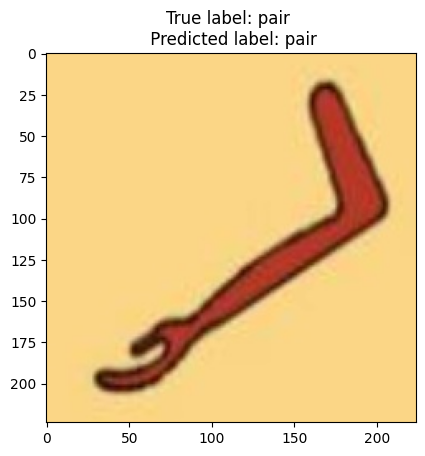

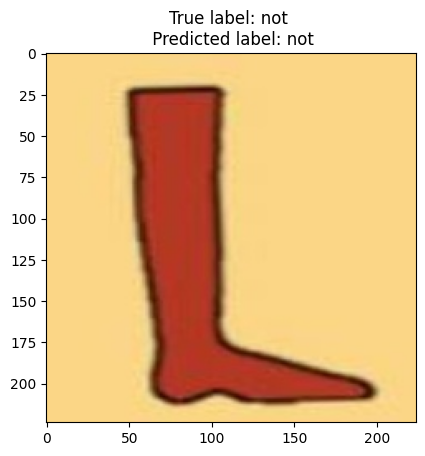

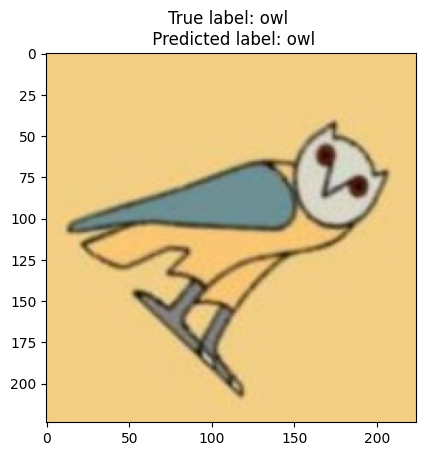

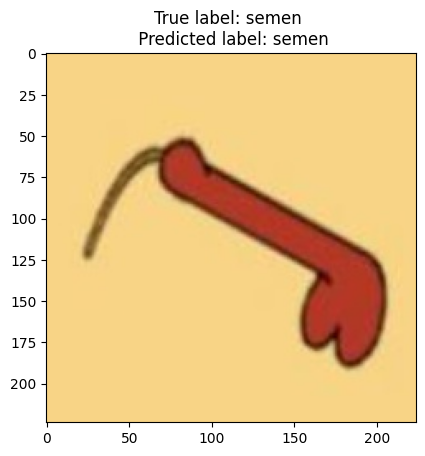

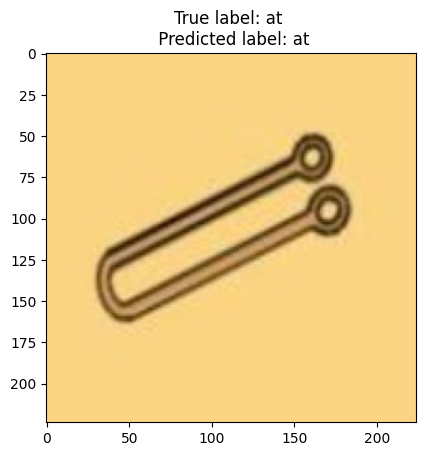

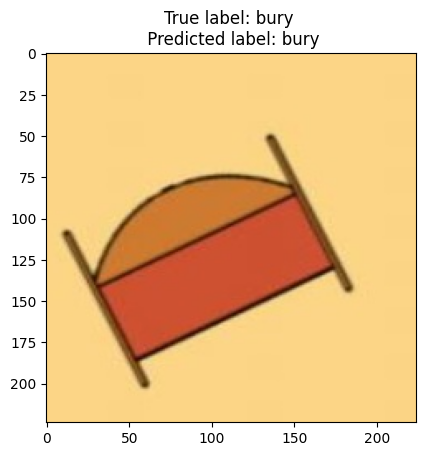

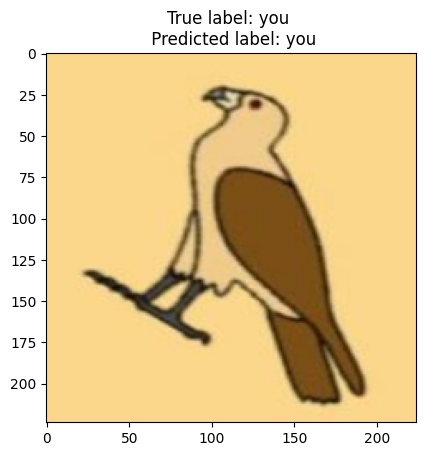

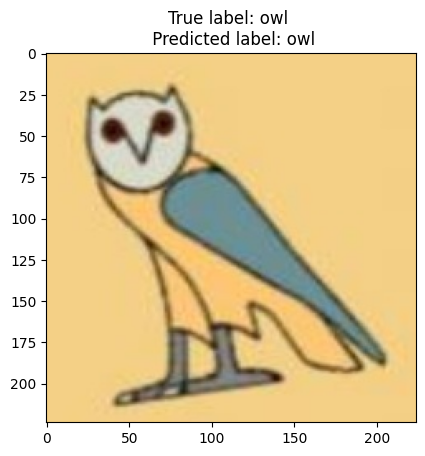

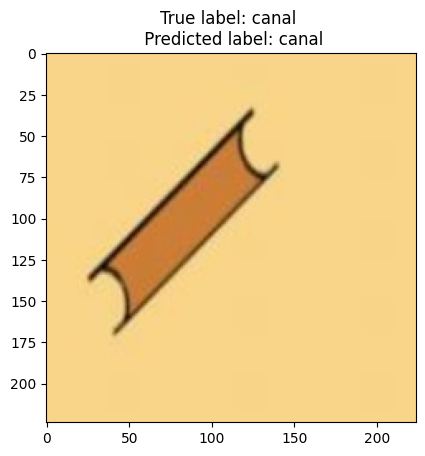

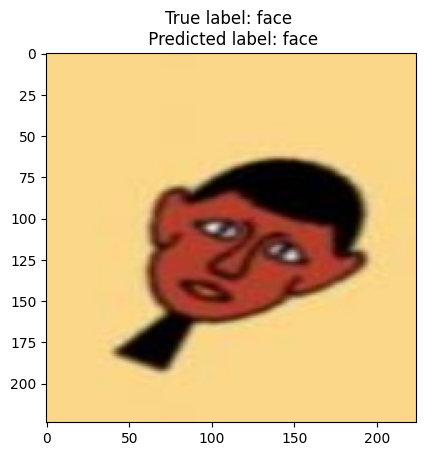

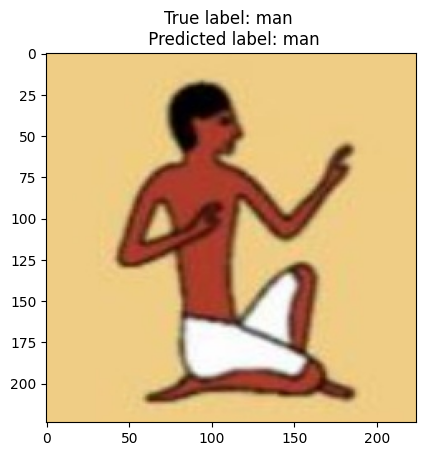

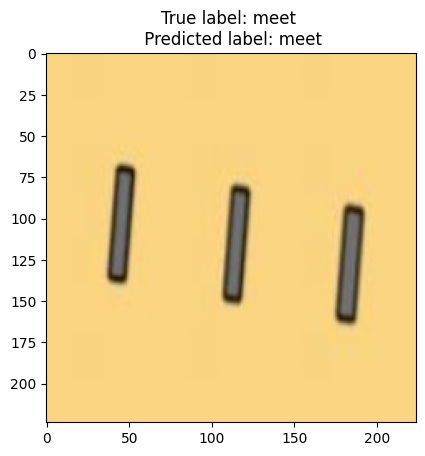

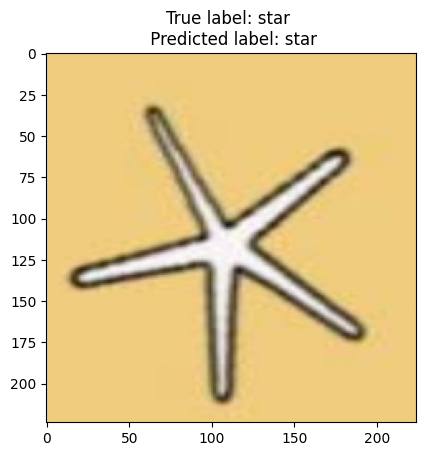

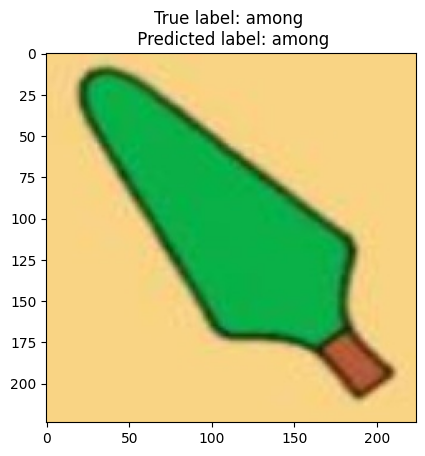

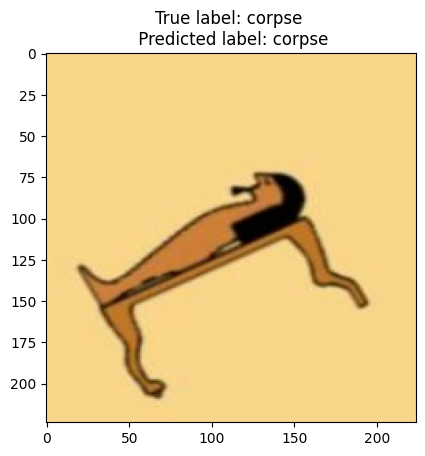

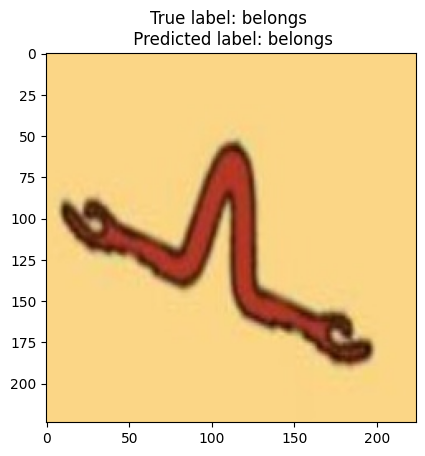

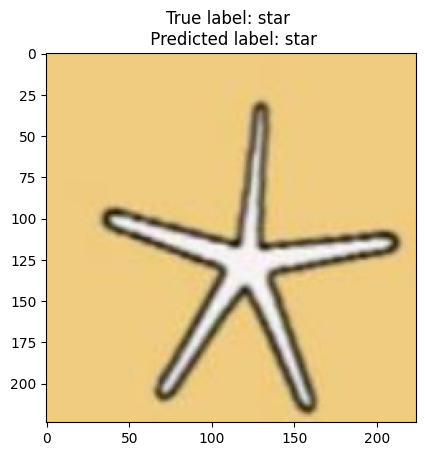

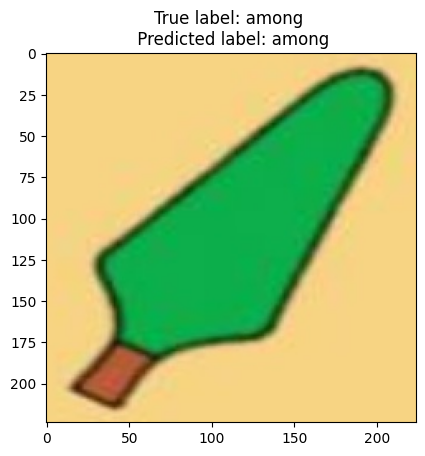

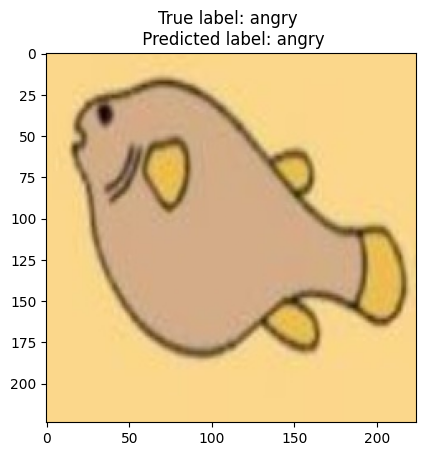

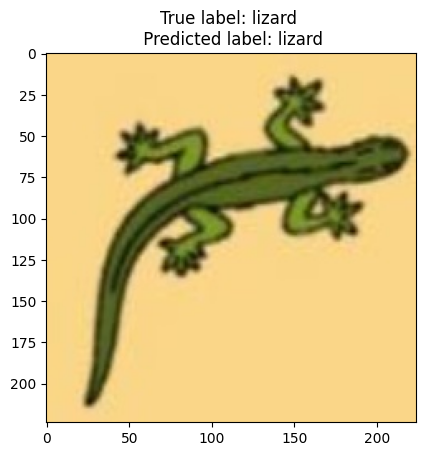

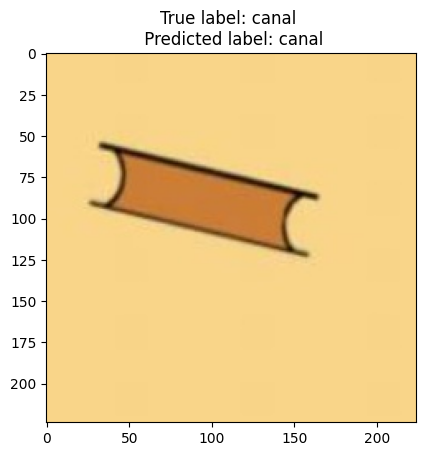

In [56]:


for batch in test_generator:
    images = batch[0]
    labels = batch[1]
    
    predictions = resnet_model.predict(images)
    predictions = np.argmax(predictions, axis=1)
    
    for i in range(len(images)):
        plt.imshow(images[i])
        plt.title(f"True label: {classes[labels[i]]} \n Predicted label: {classes[predictions[i]]}")
        plt.show()
    break

In [61]:
number_of_errors = 0

for batch in range(len(test_generator)):
    images = test_generator[batch][0]
    labels = test_generator[batch][1]
    
    predictions = resnet_model.predict(images)
    predictions = np.argmax(predictions, axis=1)
    
    errors_in_batch = 0
    for i in range(len(images)):
        if labels[i] != predictions[i]:
            number_of_errors += 1
            errors_in_batch += 1
    print(f"Batch {batch + 1} has {errors_in_batch} errors")        
    
print(f"From {len(test_generator) * 32} images, the model made {number_of_errors} errors")
print(f"The accuracy of the model is {(1 - number_of_errors / (len(test_generator) * 32)) * 100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch 1 has 0 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch 2 has 3 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Batch 3 has 2 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Batch 4 has 1 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Batch 5 has 2 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch 6 has 1 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch 7 has 1 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Batch 8 has 1 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Batch 9 has 3 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Batch 10 has 3 errors
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Batch 11 has 1 errors
From 352 images, the model made 18 errors
The accuracy of the model is 94.88636363636364 %
